# Задание на coursera #

##  Градиентный бустинг над решающими деревьями ##

Цель:
* работать с градиентным бустингом и подбирать его гиперпараметры
* сравнивать разные способы построения композиций
* понимать, в каком случае лучше использовать случайный лес, а в каком — градиентный бустинг
* использовать метрику log-loss
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from typing import List, Tuple


**Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма).**

*В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.*

In [2]:
data = pd.read_csv("gbm-data.csv")
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = data.drop('Activity',axis = 1).values
y = data['Activity'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

**Обучите GradientBoostingClassifier**

**для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:**

Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.

In [9]:
def log_loss_results(model, X: np.array, y: np.array) -> List[float]:
    return [log_loss(y, sigmoid(y_pred)) for y_pred in model.staged_decision_function(X)]

Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.

In [10]:
def sigmoid(y_pred: np.array) -> np.array:
    return 1.0 / (1.0 + np.exp(-y_pred))

Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.


Learning rate: 1
      Iter       Train Loss   Remaining Time 
         1           1.0190           26.95s
         2           0.9192           20.70s
         3           0.8272           19.77s
         4           0.7834           20.94s
         5           0.7109           20.13s
         6           0.6368           19.44s
         7           0.5797           19.08s
         8           0.5610           18.90s
         9           0.5185           18.52s
        10           0.4984           18.28s
        20           0.1999           16.64s
        30           0.1313           17.08s
        40           0.0790           15.84s
        50           0.0511           14.78s
        60           0.0352           13.87s
        70           0.0245           13.06s
        80           0.0162           12.33s
        90           0.0114           11.66s
       100           0.0077           11.01s
       200           0.0002            3.58s


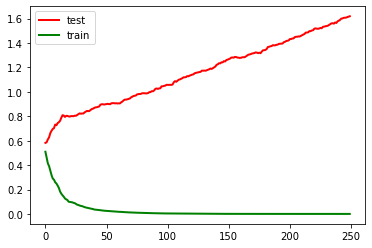

Min loss 0.58 at n_estimators=1

Learning rate: 0.5
      Iter       Train Loss   Remaining Time 
         1           1.1255           15.15s
         2           1.0035           15.03s
         3           0.9386           15.69s
         4           0.8844           17.43s
         5           0.8381           20.51s
         6           0.7995           19.91s
         7           0.7559           19.39s
         8           0.7205           18.92s
         9           0.6958           18.64s
        10           0.6725           19.10s
        20           0.4672           19.74s
        30           0.3179           20.57s
        40           0.2274           23.92s
        50           0.1774           20.87s
        60           0.1394           18.68s
        70           0.1050           17.56s
        80           0.0805           15.92s
        90           0.0650           14.59s
       100           0.0511           13.46s
       200           0.0058            4.12s


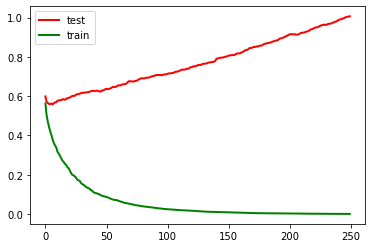

Min loss 0.56 at n_estimators=7

Learning rate: 0.3
      Iter       Train Loss   Remaining Time 
         1           1.2095           17.44s
         2           1.1006           15.86s
         3           1.0240           15.26s
         4           0.9729           15.16s
         5           0.9387           15.42s
         6           0.8948           15.66s
         7           0.8621           15.51s
         8           0.8360           15.86s
         9           0.8171           15.90s
        10           0.7883           15.82s
        20           0.6029           15.88s
        30           0.4760           15.16s
        40           0.3879           14.96s
        50           0.3325           14.39s
        60           0.2759           13.72s
        70           0.2304           13.62s
        80           0.1969           13.00s
        90           0.1718           12.38s
       100           0.1404           11.62s
       200           0.0358            3.91s


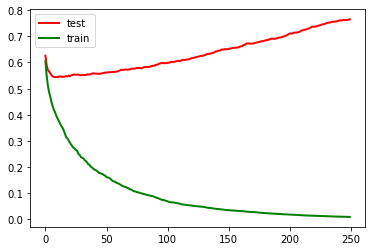

Min loss 0.54 at n_estimators=11

Learning rate: 0.2
      Iter       Train Loss   Remaining Time 
         1           1.2613           15.90s
         2           1.1715           18.51s
         3           1.1009           18.22s
         4           1.0529           17.17s
         5           1.0130           16.48s
         6           0.9740           16.17s
         7           0.9475           16.22s
         8           0.9197           15.91s
         9           0.8979           15.82s
        10           0.8730           15.67s
        20           0.7207           15.36s
        30           0.6055           14.63s
        40           0.5244           14.31s
        50           0.4501           14.19s
        60           0.3908           13.40s
        70           0.3372           12.60s
        80           0.3009           12.34s
        90           0.2603           11.64s
       100           0.2327           10.84s
       200           0.0835            3.46s


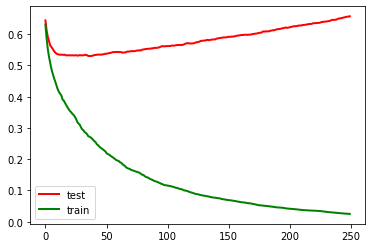

Min loss 0.53 at n_estimators=37

Learning rate: 0.1
      Iter       Train Loss   Remaining Time 
         1           1.3199           16.41s
         2           1.2645           15.20s
         3           1.2170           15.14s
         4           1.1775           15.31s
         5           1.1404           15.19s
         6           1.1106           15.05s
         7           1.0844           14.93s
         8           1.0617           15.09s
         9           1.0411           14.92s
        10           1.0223           14.82s
        20           0.8864           14.35s
        30           0.7844           13.92s
        40           0.7176           13.48s
        50           0.6590           12.93s
        60           0.6120           12.38s
        70           0.5599           11.77s
        80           0.5242           11.19s
        90           0.4829           10.56s
       100           0.4473            9.92s
       200           0.2379            3.50s


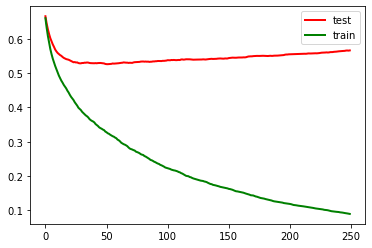

Min loss 0.53 at n_estimators=52



In [11]:
def plot_loss(learning_rate: float, test_loss: List[float], train_loss: List[float]) -> None:
    plt.figure()
    plt.plot(test_loss, "r", linewidth=2)
    plt.plot(train_loss, "g", linewidth=2)
    plt.legend(["test", "train"])
    plt.show()
min_loss_results = {}
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    print(f"Learning rate: {lr}")
    model = GradientBoostingClassifier(learning_rate=lr, n_estimators=250, verbose=True, random_state=241)
    model.fit(X_train, y_train)
    train_loss = log_loss_results(model, X_train, y_train)
    test_loss = log_loss_results(model, X_test, y_test)
    plot_loss(lr, test_loss, train_loss)
    min_loss_value = min(test_loss)
    min_loss_index = test_loss.index(min_loss_value) + 1
    min_loss_results[lr] = min_loss_value, min_loss_index
    print(f"Min loss {min_loss_value:.2f} at n_estimators={min_loss_index}\n")


**Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.**

overfitting

**Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.**

Min loss 0.53 at n_estimators=37

In [12]:
min_loss_value, min_loss_index = min_loss_results[0.2]

**На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)**

In [14]:
model = RandomForestClassifier(n_estimators=min_loss_index, random_state=241)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)
test_loss

0.5410941951182815